In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings

# Hides warning
warnings.filterwarnings('ignore') 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style

%matplotlib inline
np.random.seed(7) # seeding random number generator

In [8]:
# Loading Data

# Load 1429_1.csv
df = pd.read_csv("../data/consumer-reviews-of-amazon-products/1429_1.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [10]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [33]:
# Find unique products based on 'name'
print("Total product names : {}".format( df['name'].count() ))
print("Total unique product names : {}\n".format( np.count_nonzero(df['name'].unique()) ))

print("Total product ASINs : {}".format( df['asins'].count() ))
print("Total unique product ASINs : {}".format( np.count_nonzero(df['asins'].unique()) ))

Total product names : 27900
Total unique product names : 49

Total product ASINs : 34658
Total unique product ASINs : 42


In [34]:
# We can see that there are a certain no of products based on unique 'name'


In [49]:
# Viewing the unique product 'name's

product_names = df['name'].unique()

print("product_names : {}".format((product_names)[:10])) # Show first 10 product_names

product_names : ['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta'
 'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,'
 'Amazon Kindle Lighted Leather Cover,,,\r\nAmazon Kindle Lighted Leather Cover,,,'
 'Amazon Kindle Lighted Leather Cover,,,\r\nKindle Keyboard,,,'
 'Kindle Keyboard,,,\r\nKindle Keyboard,,,'
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta'
 'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,'
 'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,'
 'All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi -  Includes Special Offers,,'
 'Amazon Kindle Fire Hd (3rd Generation) 8gb,,,\r\nAmazon Kindle Fire Hd (3rd Generation) 8gb

In [52]:
# Viewing the unique product 'asin's

product_ASINs = df['asins'].unique()

print("product_ASINs : {}".format(list(product_ASINs))) # Show all product_ASINS

product_ASINs : ['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M', 'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2', 'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I', 'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q', 'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ', 'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU', 'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE', 'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG', 'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM', 'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE', 'B006GWO5WK']


In [53]:
# View the product names of a random ASIN

random_ASIN = 1
df[ df['asins'] == product_ASINs[random_ASIN] ]

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
2814,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",kindleoasisereaderwithleatherchargingcovermerl...,Amazon,2017-06-30T00:00:00.000Z,2017-07-15T19:01:03Z,"2017-07-09T06:47:00.000Z,2017-07-07T16:01:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5234468/review...,Very lightweight and portable with excellent b...,Works Great,NaN,NaN,Purchaser1
2815,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",kindleoasisereaderwithleatherchargingcovermerl...,Amazon,2017-06-30T00:00:00.000Z,2017-07-15T19:01:03Z,"2017-07-09T06:47:00.000Z,2017-07-07T16:01:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5234468/review...,I like this so much more than the Voyage. The ...,In love,NaN,NaN,kcladyz
2816,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",kindleoasisereaderwithleatherchargingcovermerl...,Amazon,2017-06-21T00:00:00.000Z,2017-07-15T19:01:03Z,"2017-07-09T06:47:00.000Z,2017-07-07T16:01:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5234468/review...,Replacing older reader without a light and tra...,Great size,NaN,NaN,Bbshop
2817,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",kindleoasisereaderwithleatherchargingcovermerl...,Amazon,2017-06-17T00:00:00.000Z,2017-07-15T19:01:03Z,"2017-07-09T06:47:00.000Z,2017-07-07T16:01:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5234468/review...,This is my first e-reader. I didn't know about...,Very light,NaN,NaN,diannez
2818,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",kindleoasisereaderwithleatherchargingcovermerl...,Amazon,2017-06-16T00:00:00.000Z,2017-07-15T19:01:03Z,"2017-07-09T06:47:00.000Z,2017-07-07T16:01:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5234468/review...,This kindle is awesome. I love the design of i...,Great kindle,NaN,NaN,Brandon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",kindleoasisereaderwithleatherchargingcovermerl...,Amazon,2016-05-27T00:00:00.000Z,2017-05-21T06:31:25Z,"2017-04-26T10:39:00.000Z,2017-05-10T07:36:00.0...",...,True,NaN,7.0,4.0,http://reviews.bestbuy.com/3545/5234468/review...,I was so looking forward to this that I bought...,"Fantastic, if you can afford it",NaN,NaN,Nitin
2877,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",kindleoasisereaderwithleatherchargingcovermerl...,Amazon,2016-05-27T00:00:00.000Z,2017-05-21T06:31:25Z,"2017-04-26T10:39:00.000Z,2017-05-10T07:36:00.0...",...,True,NaN,5.0,5.0,http://reviews.bestbuy.com/3545/5234468/review...,I have used Kindle e-readers since Amazon intr...,The reviews are right-this is the best Kindle ...,NaN,NaN,rlmgolfer
2878,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",kindleoasisereaderwithleatherchargingcovermerl...,Amazon,2016-05-28T00:00:00.000Z,2017-05-21T06:31:26Z,"2017-04-26T10:39:00.000Z,2017-05-10T07:36:00.0...",...,True,NaN,5.0,5.0,http://reviews.bestbuy.com/3545/5234468/review...,This is my 4th kindle and is easily the best o...,Best kindle yet

In [54]:
# ASIN is unique for similar products. We shall use ASIN to differentiate the product catagories

In [151]:
# View names of all products by grouping by product_ASINS.
 
print("ASIN \t\t\t Instances in group  \t Product name")
print('-'*80)

for group, frame in df.groupby(['asins']):
    name_list = list(frame['name'])
    name_list = list(map(str, name_list))
    name_list = [x for x in name_list if x!='nan']
    if len(name_list)>0:
        print("{} \t\t {} \t\t\t {} ".format(group , len(name_list),  name_list[0].split(',')[0][:30]))

ASIN 			 Instances in group  	 Product name
--------------------------------------------------------------------------------
B002Y27P3M 		 19 			 Kindle Keyboard 
B005PB2T0S 		 5 			 Amazon Kindle Lighted Leather  
B005PB2T2Q 		 6 			 Fire Kids Edition Tablet 
B0083Q04TA 		 4 			 Fire Tablet 
B00DU15MU4 		 6 			 Brand New Amazon Kindle Fire 1 
B00IOY8XWQ 		 580 			 Kindle Voyage E-reader 
B00IOYAM4I 		 51 			 Brand New Amazon Kindle Fire 1 
B00L9EPT8O,B01E6AO69U 		 5948 			 Echo (White) 
B00LO29KXQ 		 3 			 Fire Tablet 
B00OQVZDJM 		 3176 			 Amazon Kindle Paperwhite - eBo 
B00QJDU3KY 		 19 			 Fire Tablet 
B00REQKWGA 		 6 			 Brand New Amazon Kindle Fire 1 
B00TSUGXKE 		 372 			 Echo (White) 
B00UH4D8G2 		 8 			 Echo (White) 
B00VINDBJK 		 67 			 Kindle Oasis E-reader with Lea 
B00ZV9PXP2 		 212 			 Amazon Kindle Fire Hd (3rd Gen 
B018SZT3BK 		 270 			 Fire Tablet 
B018T075DC 		 7 			 Brand New Amazon Kindle Fire 1 
B018Y225IA 		 1038 			 Brand New Amazon Kindle Fire 1 
B018Y229OU 		 

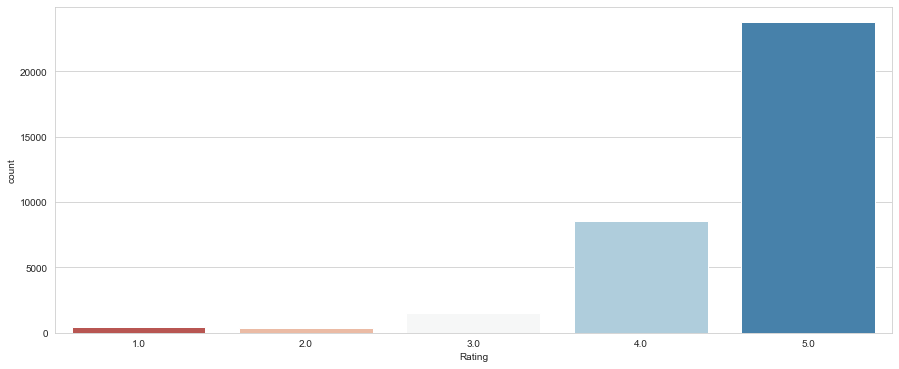

In [159]:
# Show distribution of review ratings

plt.figure(figsize=(15,6))
sns.countplot(x='reviews.rating', data=df, palette='RdBu')
plt.xlabel('Rating')
plt.show()

In [ ]:
# Most ratings are of score 4 and 5

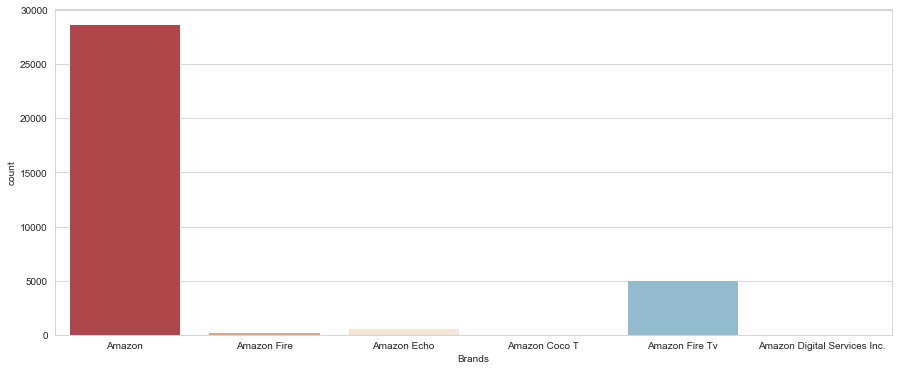

In [160]:
# Show distribution of Brand

plt.figure(figsize=(15,6))
sns.countplot(x='brand', data=df, palette='RdBu')
plt.xlabel('Brands')
plt.show()

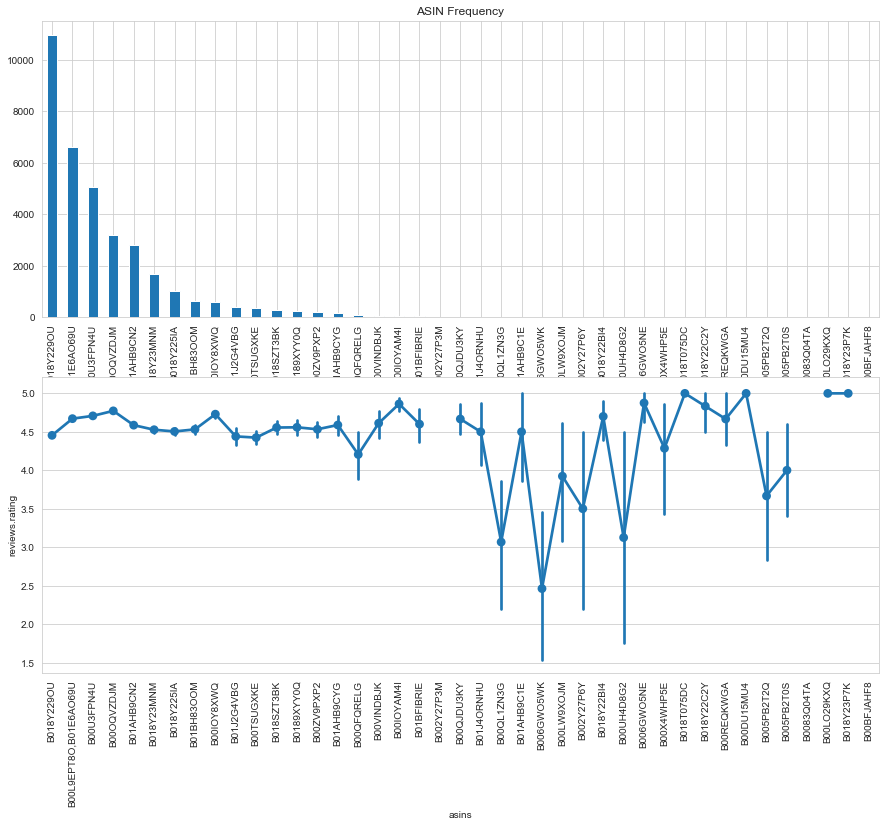

In [181]:
# Visualizing review rating per ASIN 
# Bar plot shows no. of reviews
# Point plot shows the rating and variance in the rating

asins_count_ix = df["asins"].value_counts().index
plt.subplots(2,1,figsize=(15,12))

plt.subplot(2,1,1)
df["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")

plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=df)

plt.xticks(rotation=90)
plt.show()

# Products with many reviews have rating with low variance 
# Products with few reviews have rating with high variance

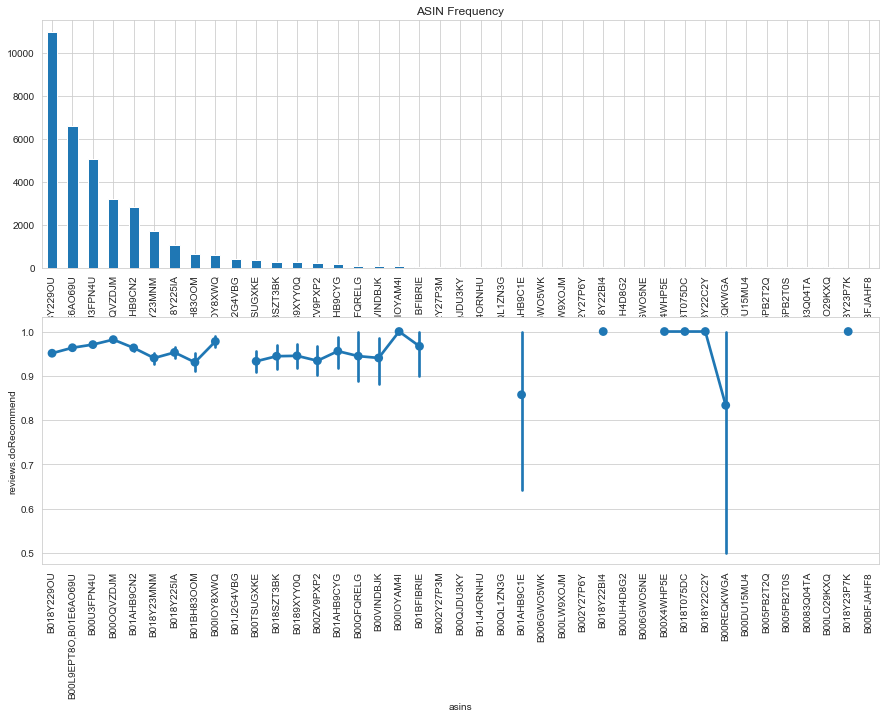

In [178]:
# Visualizing review doRecommend per ASIN 
# Bar plot shows no. of reviews
# Point plot shows the rating and variance in the rating

asins_count_ix = df["asins"].value_counts().index
plt.subplots(2,1,figsize=(15,10))

plt.subplot(2,1,1)
df["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")

plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=df)

plt.xticks(rotation=90)
plt.show()